In [1]:
from ACO_Hypercube_PreDetermined_Random import run_ants_on_hypercube_random_colors #  returns ((ant.number, path_length), iter)
import matplotlib.pyplot as plt
import time
import statistics

In [2]:
num_points = 1000
iter_list = []
path_len_list = []
ant_winner_list = []
tic = time.time()
for iter in range(num_points):
    ((ant_winner, path_len), iter) = run_ants_on_hypercube_random_colors(n=5, num_ants=7, plot_network_graph=False, plot_stats=True)
    iter_list.append(iter)
    path_len_list.append(path_len)
    ant_winner_list.append(ant_winner)
toc = time.time()
print("Time taken to run is:", toc - tic, "seconds" )

n_matchings is  [3, 1, 2, 4, 0]
n_matchings is  [1, 4, 2, 0, 4, 3, 2, 2, 4]
n_matchings is  [4, 3, 0, 2, 1]
n_matchings is  [4, 0, 1, 3, 4, 4, 2]
n_matchings is  [4, 0, 1, 4, 2, 4, 4, 3, 4]
n_matchings is  [3, 4, 1, 2, 0]
n_matchings is  [4, 2, 3, 0, 1]
n_matchings is  [4, 4, 1, 2, 1, 3, 2, 2, 4, 3, 3, 1, 2, 4, 0, 0, 0, 4, 2]
n_matchings is  [2, 1, 2, 0, 4, 0, 0, 2, 3]
n_matchings is  [3, 1, 2, 0, 1, 4, 1]
n_matchings is  [2, 2, 3, 0, 4, 2, 1]
n_matchings is  [0, 0, 3, 4, 2, 1, 0]
n_matchings is  [0, 4, 1, 2, 3]
n_matchings is  [3, 2, 3, 3, 3, 1, 2, 4, 0, 3, 0, 2, 0]
n_matchings is  [2, 1, 2, 0, 4, 3, 2]
n_matchings is  [0, 2, 1, 4, 3]
n_matchings is  [3, 1, 1, 4, 0, 0, 4, 0, 4, 4, 3, 1, 2, 1, 3, 3, 0, 2, 1, 3, 4, 2, 0]
n_matchings is  [0, 4, 1, 4, 3, 4, 2]
n_matchings is  [0, 1, 2, 4, 3]
n_matchings is  [3, 4, 0, 3, 2, 3, 1]
n_matchings is  [3, 2, 1, 0, 3, 4, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 2, 3]
n_matchings is  [2, 3, 1, 1, 0, 4, 1]
n_matchings is  [0, 0, 1, 1, 1, 3, 3, 

median iterations: 13.0
mean iterations: 29.417


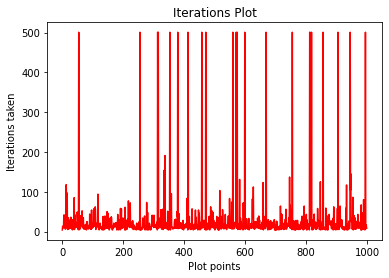

In [3]:
# Plot iterations
plt.plot([i for i in range(num_points)], iter_list, color="red")
plt.title("Iterations Plot")
plt.xlabel("Plot points")
plt.ylabel("Iterations taken")
print(f"median iterations: {statistics.median(iter_list)}")
print(f"mean iterations: {statistics.mean(iter_list)}")
plt.show()

median path_length: 8.0 nodes
mean path_length: 9.297 nodes


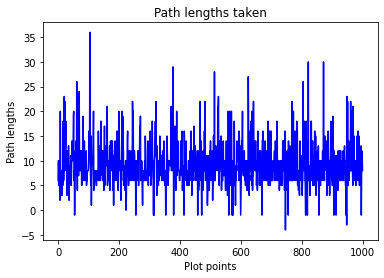

In [4]:
#Plot path lengths
plt.plot([i for i in range(num_points)], path_len_list, color="blue")
plt.title("Path lengths taken")
plt.xlabel("Plot points")
plt.ylabel("Path lengths")
print(f"median path_length: {statistics.median(path_len_list)} nodes")
print(f"mean path_length: {statistics.mean(path_len_list)} nodes")
plt.show()

median ant_winner: 2.0
mean ant_winner: 2.407


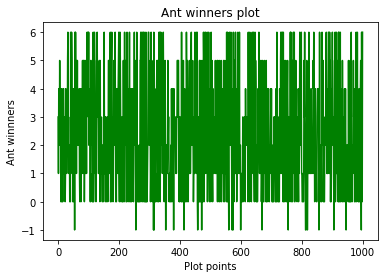

In [5]:
#Plot ant_winners
plt.plot([i for i in range(num_points)], ant_winner_list, color="green")
plt.title("Ant winners plot")
plt.xlabel("Plot points")
plt.ylabel("Ant winnners")
print(f"median ant_winner: {statistics.median(ant_winner_list)}")
print(f"mean ant_winner: {statistics.mean(ant_winner_list)}")
plt.show()

In [6]:
from ACO_Hypercube_PreDetermined_Random_Pheromone import run_ants_on_hypercube_random_colors_optimized
import matplotlib.pyplot as plt
import time
import statistics

Time taken to generate adjacency list is  0.008082389831542969  seconds
Time taken to generate randomized colouring is  0.003980159759521484  seconds
iteration:  0
iteration:  1
Ant 1 is violated:  False
Ant 3 is violated:  False
Ant 4 is violated:  False
Ant 5 is violated:  False
Ant 6 is violated:  False
iteration:  2
iteration:  3
Ant 2 is violated:  False
iteration:  4
Ant 0 is violated:  False
n_matchings is  [4, 2, 1, 0, 3]
Ant 0 reached the end vertex first time
iteration:  5
None


In [7]:
num_points = 1000
iter_list = []
path_len_list = []
ant_winner_list = []
tic = time.time()
for iter in range(num_points):
    ((ant_winner, path_len), iter) = run_ants_on_hypercube_random_colors_optimized(n=5, num_ants=7, plot_network_graph=False, plot_stats=True)
    iter_list.append(iter)
    path_len_list.append(path_len)
    ant_winner_list.append(ant_winner)
toc = time.time()
print("Time taken to run is:", toc - tic, "seconds" )

n_matchings is  [0, 2, 4, 2, 2, 0, 1, 3, 0]
n_matchings is  [2, 1, 4, 3, 0]
n_matchings is  [3, 0, 1, 4, 2]
n_matchings is  [1, 4, 2, 0, 3]
n_matchings is  [4, 2, 3, 0, 1]
n_matchings is  [3, 4, 1, 0, 2]
n_matchings is  [4, 3, 0, 2, 1]
n_matchings is  [0, 3, 2, 4, 1]
n_matchings is  [4, 2, 3, 1, 0]
n_matchings is  [1, 0, 2, 3, 4]
n_matchings is  [0, 3, 4, 2, 1]
n_matchings is  [3, 1, 4, 2, 0]
n_matchings is  [4, 1, 2, 3, 3, 3, 0]
n_matchings is  [3, 0, 2, 1, 3, 4, 3]
n_matchings is  [0, 4, 1, 3, 2]
n_matchings is  [1, 2, 4, 0, 3]
n_matchings is  [2, 3, 0, 4, 1]
n_matchings is  [0, 4, 3, 2, 1]
n_matchings is  [1, 4, 0, 2, 3]
n_matchings is  [3, 1, 4, 2, 0]
n_matchings is  [1, 2, 2, 3, 3, 0, 4, 3, 0, 2, 0]
n_matchings is  [2, 1, 4, 3, 2, 0, 2]
n_matchings is  [2, 3, 0, 4, 1]
n_matchings is  [1, 4, 3, 0, 2]
n_matchings is  [0, 1, 3, 4, 2]
n_matchings is  [1, 4, 3, 0, 2]
n_matchings is  [1, 2, 0, 4, 3]
n_matchings is  [3, 4, 0, 2, 1]
n_matchings is  [0, 2, 3, 2, 2, 1, 4]
n_matchings is  [2

median iterations: 5.0
mean iterations: 12.61


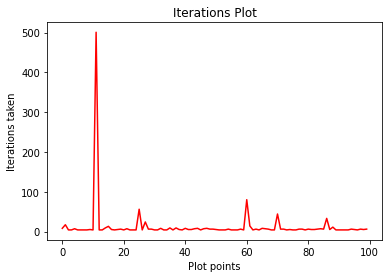

In [ ]:
# Plot iterations
plt.plot([i for i in range(num_points)], iter_list, color="red")
plt.title("Iterations Plot")
plt.xlabel("Plot points")
plt.ylabel("Iterations taken")
print(f"median iterations: {statistics.median(iter_list)}")
print(f"mean iterations: {statistics.mean(iter_list)}")
plt.show()

median path_length: 6.0 nodes
mean path_length: 6.42 nodes


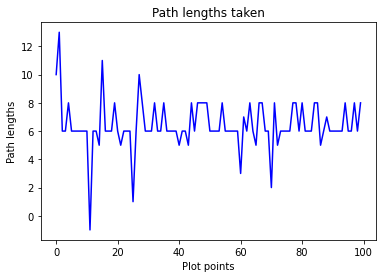

In [ ]:
#Plot path lengths
plt.plot([i for i in range(num_points)], path_len_list, color="blue")
plt.title("Path lengths taken")
plt.xlabel("Plot points")
plt.ylabel("Path lengths")
print(f"median path_length: {statistics.median(path_len_list)} nodes")
print(f"mean path_length: {statistics.mean(path_len_list)} nodes")
plt.show()

median ant_winner: 1.0
mean ant_winner: 1.92


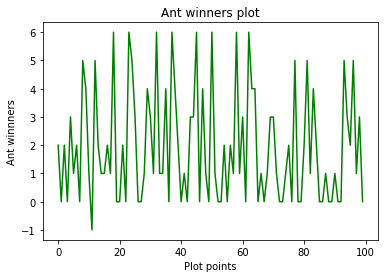

In [ ]:
#Plot ant_winners
plt.plot([i for i in range(num_points)], ant_winner_list, color="green")
plt.title("Ant winners plot")
plt.xlabel("Plot points")
plt.ylabel("Ant winnners")
print(f"median ant_winner: {statistics.median(ant_winner_list)}")
print(f"mean ant_winner: {statistics.mean(ant_winner_list)}")
plt.show()